Importing pandas to use for data analysis

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline

<h1> Preliminary analyis: </h1>

The data set deals with the trees in pittsburgh. The data set ranges from what kind of tree they are, the property value they give off, the air quality benifits they give off , where they are located and so much more. 

The project is managed by the pittsburgh department of public service and all benifits are calulated using the National Tree Benefit Calculator Web Service

In [3]:
trees = pd.read_csv("tree_Data.csv", low_memory = False)


In [4]:
trees.head(5)

,id,address_number,street,common_name,scientific_name,height,width,growth_space_length,growth_space_width,growth_space_type,...,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,754166088,7428,MONTICELLO ST,Stump,Stump,0.0,0.0,10.0,2.0,Well or Pit,...,Homewood North,9.0,13.0,4.200313e+10,2.0,13.0,5.0,3-17,40.458169,-79.889724
1,1946899269,220,BALVER AVE,Linden: Littleleaf,Tilia cordata,0.0,0.0,99.0,99.0,Open or Unrestricted,...,Oakwood,2.0,28.0,4.200356e+10,5.0,28.0,6.0,1-19,40.429269,-80.067868
2,1431517397,2822,SIDNEY ST,Maple: Red,Acer rubrum,22.0,6.0,6.0,3.0,Well or Pit,...,South Side Flats,3.0,16.0,4.200316e+10,3.0,16.0,3.0,4-24,40.426797,-79.965035
3,994063598,608,SUISMON ST,Maple: Freeman,Acer x freemanii,25.0,10.0,3.0,3.0,Well or Pit,...,East Allegheny,1.0,23.0,4.200356e+10,1.0,23.0,1.0,1-6,40.455503,-79.999276
4,1591838573,1135,N NEGLEY AVE,Maple: Norway,Acer platanoides,52.0,13.0,99.0,99.0,Open or Unrestricted,...,Highland Park,7.0,11.0,4.200311e+10,2.0,11.0,5.0,3-9,40.476667,-79.924106


It is easy to see that this data set has alot of information so filtering through it will be very benifical to get an understanding of what neighborhood is the "best" the next few cells wiill be dedicated to that.

In [5]:
edited_trees = trees.filter(items = ['overall_benefits_dollar_value','neighborhood'])
edited_trees.head(5)

,overall_benefits_dollar_value,neighborhood
0,NaN,Homewood North
1,125.178322,Oakwood
2,77.767116,South Side Flats
3,81.838259,East Allegheny
4,390.538994,Highland Park


Oh no! the dataset needs some cleaning up since some of the benefits are NaN

In [6]:
edited_trees = edited_trees.dropna()
edited_trees.head(5)

,overall_benefits_dollar_value,neighborhood
1,125.178322,Oakwood
2,77.767116,South Side Flats
3,81.838259,East Allegheny
4,390.538994,Highland Park
5,206.575018,Highland Park


much better now we can do some data analysis.

In [7]:
tree_dict = (trees.groupby('neighborhood').overall_benefits_dollar_value.median()).to_dict()  

so that was alot of code in one line. Let me break down what is happening in this specific instance. First I group the dataframe by the neighborhood tag and it goes through every instance of a neighborhood<br>
in the dataframe to then get the value of benifits that each tree has. Then when it has the group for each neighborhood it gets the median value. <br>
<h3> Quick break: Why the median? </h3>
<br>
So when I was doing my analysis I noticed one thing. ALl of the data was skewed to the right. IF you are unfamiliar with data skew let me show you an example.


<AxesSubplot:ylabel='Frequency'>

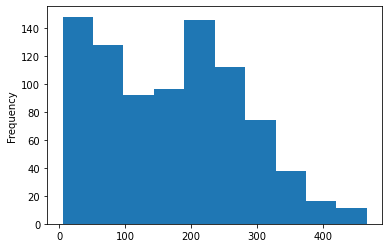

In [8]:
center = trees.loc[(trees.neighborhood == 'Allegheny Center')]
center["overall_benefits_dollar_value"].plot(kind = 'hist')

Notic how there is a trail going of to the right in this plot. This is an example of a right skew. When we examine the median and the mean of this we notice there is a diffrence.

In [9]:
print("Median:" + format(center["overall_benefits_dollar_value"].median()))
print("Mean:" + format(center["overall_benefits_dollar_value"].mean()))

Median:174.623107103
Mean:171.7918814138839


Since the mean does not equal the median this means that the data is not normaly distributed and thus me have to pick one or the other to describe the center of data. When data is right skewed we use the median.<br>
<h3> back to the explination </h3>
<br>
So now that we have all the medians of the data frame the to_dict() function does exactly that, puts our data into a dictionary which is easier to look at.

In [10]:
print(tree_dict)

{'Allegheny Center': 174.623107103, 'Allegheny West': 120.062255169, 'Allentown': 117.2930078085, 'Arlington': 49.008668432099995, 'Arlington Heights': 202.272850786, 'Banksville': 116.702199174, 'Bedford Dwellings': 48.098406723900005, 'Beechview': 92.80532685540001, 'Beltzhoover': 108.730609964, 'Bloomfield': 82.2188501225, 'Bluff': 68.93895328890001, 'Bon Air': 88.7894182384, 'Brighton Heights': 109.86041445800001, 'Brookline': 118.773008461, 'California-Kirkbride': 105.047563877, 'Carrick': 90.2032728081, 'Central Business District': 82.8933780303, 'Central Lawrenceville': 56.2121691941, 'Central Northside': 85.6451174555, 'Central Oakland': 110.520653484, 'Chartiers City': 117.8465146625, 'Chateau': 96.5507091598, 'Crafton Heights': 116.702199174, 'Crawford-Roberts': 85.6451174555, 'Duquesne Heights': 72.4832284541, 'East Allegheny': 87.850429656, 'East Carnegie': 184.9555221905, 'East Hills': 135.3272557055, 'East Liberty': 69.2360469007, 'Elliott': 123.24278906299999, 'Esplen': 

<h5> Oh no more mess... </h5><br>
this is alot of data to look at. We should sample this to sort out our highest values. 

In [11]:
sorted(tree_dict, key = tree_dict.get, reverse = True)[:5]

['St. Clair', 'Fairywood', 'Arlington Heights', 'East Carnegie', 'Hays']

Great so now we have our top 5 values lets examine these in more depth.
so what is the median for all of these values?

In [12]:
print("St. Clair: " + format(tree_dict.get('St. Clair')))
print("Fairywood: " + format(tree_dict.get('Fairywood')))
print("Arlington Heights: " + format(tree_dict.get('Arlington Heights')))
print("East Carnegie: " + format(tree_dict.get('East Carnegie')))
print("Hays: " + format(tree_dict.get('Hays')))

St. Clair: 206.2582913845
Fairywood: 202.31615907900002
Arlington Heights: 202.272850786
East Carnegie: 184.9555221905
Hays: 181.397514538


From this information it seems that we would say that St. Clair would be the best neighborhood. However it is important to look at things holisticly. Thats why to draw any conclusion I think that it is important to keep it openended <br>
I think that anyone of these neighborhoods can be viewed as the best. To draw a definitive answer thought it is important to look at more data then just trees in ceratin neighborhoods.

<h2> A look at the 3-1-1 requests</h2><br>
So what is 3-1-1? Well 3-1-1 is designed for citizens to call and make non-emergency complaints or report problems like graffiti or road damage 

In [13]:
three = pd.read_csv('311.csv', low_memory = False)

In [18]:
print(three['NEIGHBORHOOD'].value_counts())
s1 = three['NEIGHBORHOOD'].value_counts()

Brookline               20529
Carrick                 19523
South Side Slopes       16293
Squirrel Hill South     16257
South Side Flats        14763
                        ...  
East Carnegie             459
Northview Heights         456
Glen Hazel                309
Arlington Heights          99
Mount Oliver Borough       59
Name: NEIGHBORHOOD, Length: 91, dtype: int64


So from this data we can look at the number of requests and use that as a metric to see what neighborhood is best. Lets look at some grpahs that show this.

<AxesSubplot:>

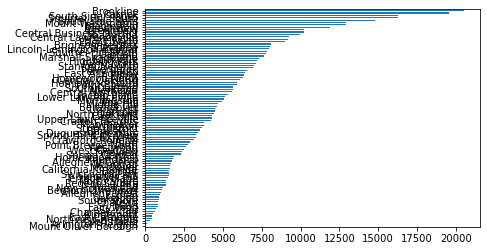

In [15]:
three.NEIGHBORHOOD.value_counts().sort_values().plot(kind = 'barh')

messy...

In [30]:
df = s1.to_frame()

In [35]:
df = df[85:]

<AxesSubplot:>

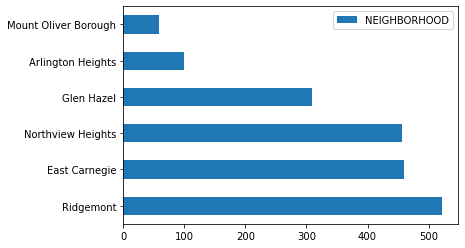

In [36]:
df.plot(kind = 'barh')

So this breaks the data up even more and is a bar graph to showq the number of reports per neighborhood. Again however I cannot say definitivly that there is one supperior neighborhood based upon the data but a set of good neighborhood. This set would be these 6 neighborhoods.